### Hubble's law and the age of the Universe


### Φορτώνουμε βιβλιοθήκες

In [58]:
import numpy as np
import matplotlib.pyplot as plt # Matplotlib is the standard library for making plots
from scipy.optimize import curve_fit 
plt.rcParams['figure.figsize'] = [14, 8] # This is a global Matplotlib parameters for the default figure size
# in case you opened this file from the wrong directory
#import os  
#cwd=os.getcwd(); print(cwd)
#path='/Users/labuser...'
#os.chdir(path)


### Μετρήσεις για γωνιακά μεγέθη
Υποθέτουμε ότι η φαινόμενη διάμετρος ενός γαλαξία στον ουρανό είναι $d$ ($d\simeq 22\,\mathrm{kpc}$)
!["image"](gero_obs.png?_ipython_update=20200718165242)
Για πολύ μικρή γωνία $\alpha$ μπορούμε να χρησιμποιήσουμε την $\tan \alpha \sim \alpha$
άρα
$$
\tan \alpha \sim \alpha = \frac{d}{D} \rightarrow  D=\frac{d}{\alpha}
$$

**ΠΡΟΣΟΧΗ: Υποθέτουμε Ευκλείδια κοσμολογία, ισχύει για πολύ κοντινούς μόνο!**

In [62]:
angular_diameter=np.array([1.129,0.883,0.805,1.391])*1e-3 #radians (ADD YOUR OWN MEASUREMENTS)
d_galaxy=22. #intrinsic diameter in kpc
distance = d_galaxy / angular_diameter # kpc
distance /= 1000. # to Mpc
print(distance)

[19.48627104 24.91506229 27.32919255 15.81595974]


### Μετρήσεις ερυθρομετατόπισης
Λόγω του φαινομένου Doppler μια γραμμή εκπομπής (ή απορρόφησης) μετατοπίζεται από τη εργαστηριακή της τιμή $\lambda _\mathrm{emit}$ κατα $\delta \lambda=\lambda _\mathrm{obs}- \lambda _\mathrm{emit}$. 

Η σχετική ταχύτητα μπορεί να υπολογιστεί από τη σχέση $v=z c $ όπου $z$ ορίζουμε τη ποσότητα $ z=\frac{\delta \lambda}{\lambda _\mathrm{emit}}$, άρα

$$
v=c \frac{\delta \lambda}{\lambda _\mathrm{emit}}
$$


In [68]:
# lambda_emit=3933.7
# dlambda=np.array([3964.5,3962.2,3968.4])-lambda_emit #(ADD YOUR OWN MEASUREMENTS)
# c=2.9979e5 #km/s
# v=c*dlambda/lambda_emit

In [63]:
lambda_emit=6563.
dlambda=np.array([6609.8,6609.0,6616.8,6594.3])-lambda_emit #(ADD YOUR OWN MEASUREMENTS)
c=2.9979e5 #km/s
v=c*dlambda/lambda_emit

Text(0, 0.5, 'Velocity [km/s]')

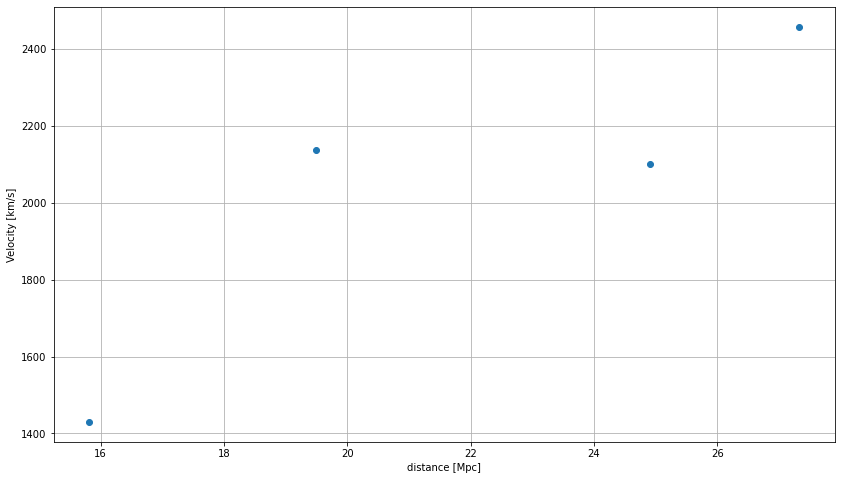

In [64]:
# plot the x,y data
plt.plot(distance,v,'o',label="Hubble's law") 
plt.grid()
plt.xlabel('distance [Mpc]')
plt.ylabel('Velocity [km/s]')

### Προσαρμογή ευθείας με χ^2
#### Μοντέλο γραμμικής διαστολής του Hubble
$$
V(D)=\mathrm{const}+H_0 \times D
$$
* D in $\mathrm{Mpc}$
* $H_0$ in $\mathrm{(km/s)/Mpc}$
* V in $\mathrm{km/s}$

In [65]:
def HubbleLaw(x,const,H0): return (const+H0*x)
popt, pcov = curve_fit(HubbleLaw, distance, v)#, sigma=dv)
dpopt=np.sqrt(np.diag(pcov)) # from the covariance matrix we get the error on parameters
print(f"const = ({popt[0]:.1f} +/- {dpopt[0]:.2f}) km/s")
print(f"H0 = ({popt[1]:.1f} +/- {dpopt[1]:.2f}) km/s/Mpc") 
const=popt[0]
H0=popt[1]


const = (437.9 +/- 626.87) km/s
H0 = (72.8 +/- 28.05) km/s/Mpc


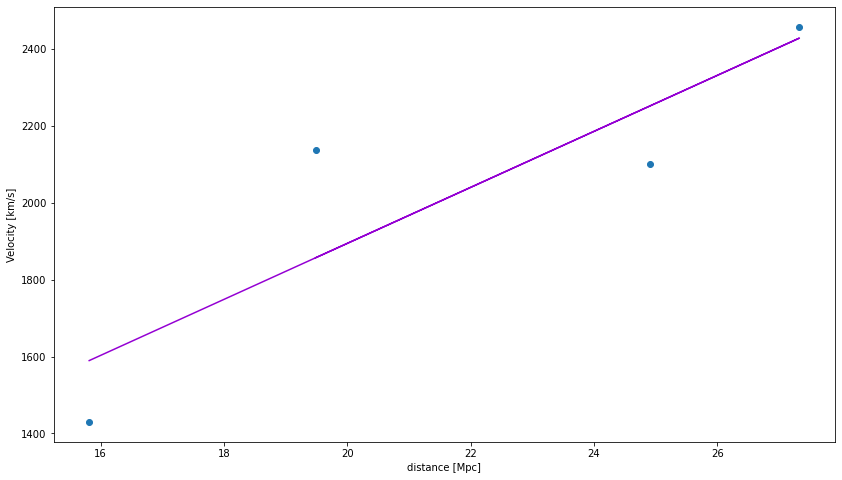

In [66]:
# plot the x,y data
plt.plot(distance,v,'o',) 
plt.xlabel('distance [Mpc]')
plt.ylabel('Velocity [km/s]')

# plot the best fit model
plt.plot(distance,const+H0*distance,label='best line',color='darkviolet')


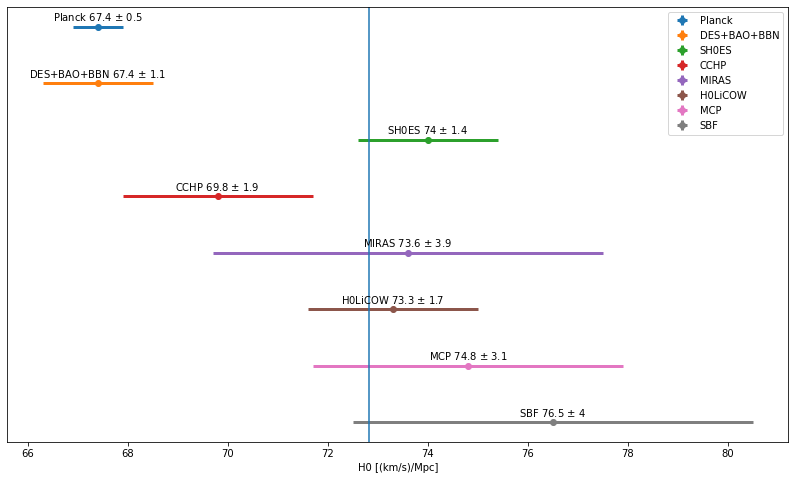

In [67]:
Hvals={"Planck":[67.4,0.5],
"DES+BAO+BBN":[67.4,1.1],
"SH0ES":[74,1.4],
"CCHP":[69.8,1.9],
"MIRAS":[73.6,3.9],
"H0LiCOW":[73.3,1.7],
"MCP":[74.8,3.1],
"SBF":[76.5,4],}
Y=10
for val in Hvals:
    Y=Y-1
    plt.text(Hvals[val][0],Y+0.1,val+f" {Hvals[val][0]} $\pm$ {Hvals[val][1]}",horizontalalignment="center")
    plt.errorbar(Hvals[val][0],Y,fmt='o',yerr=0,xerr=Hvals[val][1],label=val,linewidth=3)
plt.legend()
plt.xlabel("H0 [(km/s)/Mpc]")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelleft=False)
plt.axvline(H0)

### Estimation of the "age" of the universe.
#### Units transformations
$$
\big[H_0\big]=\mathrm{(km/s)/Mpc}=\frac{1}{9.8 \times 10^{11} \mathrm{yrs}}
$$

In [22]:
kms_s_Mpc_to_inv_yrs=9.8e11
age_of_universe=1/H0 * kms_s_Mpc_to_inv_yrs
print(f"{age_of_universe:.2E} yrs")

1.35E+11 yrs
